# Manhattan Distance

Manhattan distance, also known as L1 distance or city block distance, measures the distance between two points by summing the absolute differences of their coordinates. Imagine navigating a city where you can only travel along predefined streets (horizontally or vertically), like walking blocks in a grid. The Manhattan distance is the shortest path you'd take in such a scenario.

Formula:

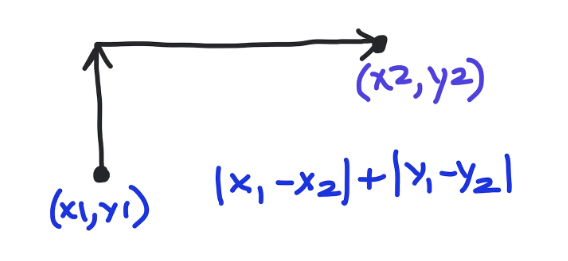


Example: Customer Preferences for Breakfast Items

Let's say we have two customers, Alice and Bob, and we've asked them to rate their preference for two breakfast items on a scale of 1 to 5: Pancakes and Waffles.

Alice's Preferences:

* Pancakes: 4
* Waffles: 2
* So, Alice's preference "point" is (4,2)

Bob's Preferences:

* Pancakes: 2
* Waffles: 5
* So, Bob's preference "point" is (2,5)

Now, let's calculate the Manhattan distance between Alice's and Bob's preferences:

* Difference in Pancakes preference (absolute): ∣2−4∣=∣−2∣=2
* Difference in Waffles preference (absolute): ∣5−2∣=∣3∣=3
* Sum the absolute differences: 2+3=5

So, the Manhattan distance between Alice's and Bob's preferences is 5.

Why "City Block"?

Imagine plotting these points on a grid:

* Alice is at (4,2)
* Bob is at (2,5)

To get from Alice to Bob by only moving horizontally or vertically (like walking blocks in a city):

* You'd move 2 units to the left (from 4 to 2 on the X-axis).
* You'd move 3 units up (from 2 to 5 on the Y-axis).
* Total "blocks" moved = 2 + 3 = 5.

This distance of 5 quantifies the total difference in their preferences when considering each item independently and summing up those differences. It's often preferred over Euclidean distance when individual feature differences are more important than the overall "as-the-crow-flies" distance.

# Notebook Structure

1. Import necessary libraries
2. Create the dataset
3. Utility function to calculate the Manhattan Distance
4. Choose a reference student
5. Calculating the Manhattan distance from reference student without applying standardization
6. Calculating the Manhattan distance from reference student after applying standardization

# 1. Import necessary libraries

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 2. Create the dataset

In [35]:
# 1. Create a dataset with 20 students and convert to DataFrame

np.random.seed(42) # for reproducibility

num_students = 20
data = {
    'Hours Studied': np.random.randint(5, 20, num_students),
    'Practice Questions': np.random.randint(30, 150, num_students),
    'Attendance Rate': np.random.randint(60, 100, num_students),
    'Prior Exam Score': np.random.randint(50, 95, num_students)
}

In [36]:
# Convert it into a dataframe and add a index

students_df = pd.DataFrame(data)
students_df.index = [f'Student_{i+1}' for i in range(num_students)]


In [37]:
print("Original Student Learning Pattern Data (DataFrame):")

students_df

Original Student Learning Pattern Data (DataFrame):


,Hours Studied,Practice Questions,Attendance Rate,Prior Exam Score
Student_1,11,51,87,84
Student_2,8,82,75,63
Student_3,17,31,74,66
Student_4,19,117,62,85
Student_5,15,137,96,89
Student_6,12,59,66,53
Student_7,17,67,80,51
Student_8,9,31,68,55
Student_9,11,93,98,91
Student_10,14,89,77,53


# 3. Utility function to calculate the Manhattan Distance

In [38]:
def manhattan_distance(point1, point2):

    """
    Calculates the Manhattan distance (L1 distance) between two n-dimensional points.
    Assumes points are pandas Series or numpy arrays.
    """
    point1 = np.array(point1)
    point2 = np.array(point2)
    return np.sum(np.abs(point1 - point2))

# 4. Choose a reference student

In [39]:
# Choose a reference student (e.g., the first student in the DataFrame)

reference_student_name = students_df.index[0]
reference_student_pattern = students_df.loc[reference_student_name]

print(f"Reference Student for Comparison: {reference_student_name}")
print(f"Pattern: {reference_student_pattern.to_dict()}")
print("-" * 70)

Reference Student for Comparison: Student_1
Pattern: {'Hours Studied': 11, 'Practice Questions': 51, 'Attendance Rate': 87, 'Prior Exam Score': 84}
----------------------------------------------------------------------


# 5. Calculating the Manhattan distance from reference student without applying standardization

In [40]:
# Calculate distance measure with one student and others WITHOUT standardization

print("--- Calculating Manhattan Distances WITHOUT Standardization ---")
distances_no_std = {}
for student_name, pattern in students_df.iterrows():
    if student_name != reference_student_name:
        dist = manhattan_distance(reference_student_pattern, pattern)
        distances_no_std[student_name] = dist

# Sort and print results
sorted_distances_no_std = sorted(distances_no_std.items(), key=lambda item: item[1])

print(f"\nClosest students to {reference_student_name} (WITHOUT standardization):")
for student, dist in sorted_distances_no_std[:5]: # Display top 5 closest
    print(f"- {student}: {dist:.2f}")
print("...")
for student, dist in sorted_distances_no_std[-5:]: # Display bottom 5 furthest
    print(f"- {student}: {dist:.2f}")
print("-" * 70)

--- Calculating Manhattan Distances WITHOUT Standardization ---

Closest students to Student_1 (WITHOUT standardization):
- Student_15: 4.00
- Student_12: 31.00
- Student_11: 35.00
- Student_18: 49.00
- Student_3: 57.00
...
- Student_10: 82.00
- Student_19: 95.00
- Student_4: 100.00
- Student_5: 104.00
- Student_16: 139.00
----------------------------------------------------------------------


It is identifying which 5 students have the most similar study habits to the reference_student ('Student_1') and which 5 are the least similar, based on the raw, unscaled values of 'Hours Studied', 'Practice Questions', 'Attendance Rate', and 'Prior Exam Score'.

# 6.Calculating the Manhattan distance from reference student after applying standardization

### A. Standardize the dataframe

In [41]:

# Standardize the entire DataFrame

scaler = StandardScaler()
students_scaled_array = scaler.fit_transform(students_df)
students_scaled_df = pd.DataFrame(students_scaled_array, columns=students_df.columns, index=students_df.index)

print("\nScaled Student Learning Pattern Data (DataFrame ):")

students_scaled_df


Scaled Student Learning Pattern Data (DataFrame ):


,Hours Studied,Practice Questions,Attendance Rate,Prior Exam Score
Student_1,-0.307661,-0.998752,1.042323,0.892015
Student_2,-1.186694,-0.020511,-0.074452,-0.649739
Student_3,1.450404,-1.629875,-0.167516,-0.429489
Student_4,2.036425,1.083954,-1.284291,0.965432
Student_5,0.864382,1.715076,1.879904,1.259099
Student_6,-0.014651,-0.746303,-0.912032,-1.383908
Student_7,1.450404,-0.493854,0.390871,-1.530742
Student_8,-0.893683,-1.629875,-0.725903,-1.237074
Student_9,-0.307661,0.326606,2.066033,1.405933
Student_10,0.571371,0.200382,0.111677,-1.383908


### B. Choose the reference student

In [42]:
# Get the scaled pattern for the reference student

reference_student_scaled_pattern = students_scaled_df.loc[reference_student_name]

print(f"Reference Student (Scaled) for Comparison: {reference_student_name}")
print(f"Pattern: {reference_student_scaled_pattern.apply(lambda x: f'{x:.2f}').to_dict()}")

Reference Student (Scaled) for Comparison: Student_1
Pattern: {'Hours Studied': '-0.31', 'Practice Questions': '-1.00', 'Attendance Rate': '1.04', 'Prior Exam Score': '0.89'}


### C. Calculate the Euclidian Distance and most 5 and least 5 similar students from reference student

In [43]:

distances_std = {}
for student_name, pattern in students_scaled_df.iterrows():
    if student_name != reference_student_name:
        dist = manhattan_distance(reference_student_scaled_pattern, pattern)
        distances_std[student_name] = dist

# Sort and print results
sorted_distances_std = sorted(distances_std.items(), key=lambda item: item[1])

print(f"\nClosest students to {reference_student_name} (WITH standardization):")
for student, dist in sorted_distances_std[:5]: # Display top 5 closest
    print(f"- {student}: {dist:.2f}")
print("...")
for student, dist in sorted_distances_std[-5:]: # Display bottom 5 furthest
    print(f"- {student}: {dist:.2f}")
print("-" * 70)

print("\n--- Comparison of Results ---")
print("Observe how the absolute Manhattan distance values change after standardization.")
print("Even with Manhattan distance, features with larger raw scales (like 'Practice Questions') will still contribute disproportionately more to the total sum of absolute differences.")
print("Standardization ensures that all features contribute more equally to the distance, leading to a more balanced and often more meaningful assessment of similarity based on the overall pattern.")


Closest students to Student_1 (WITH standardization):
- Student_15: 0.55
- Student_12: 1.87
- Student_18: 2.69
- Student_9: 2.86
- Student_17: 3.81
...
- Student_10: 5.28
- Student_7: 5.34
- Student_20: 5.67
- Student_4: 6.83
- Student_16: 7.55
----------------------------------------------------------------------

--- Comparison of Results ---
Observe how the absolute Manhattan distance values change after standardization.
Even with Manhattan distance, features with larger raw scales (like 'Practice Questions') will still contribute disproportionately more to the total sum of absolute differences.
Standardization ensures that all features contribute more equally to the distance, leading to a more balanced and often more meaningful assessment of similarity based on the overall pattern.


# Interpretation

Standardization is essential for Manhattan distance for the same fundamental reason it's essential for Euclidean distance: to prevent features with larger inherent numerical scales from dominating the distance calculation. Even though Manhattan distance sums absolute differences rather than squared differences, a large raw difference in a feature with a wide range will still contribute disproportionately more to the total distance than a significant difference in a feature with a smaller range. Standardizing ensures all features are on a comparable scale, allowing each to contribute equally to the overall measure of dissimilarity and providing a more balanced and accurate representation of the true underlying patterns in the data.